<a href="https://colab.research.google.com/github/S-Devisri01/Python-colab/blob/main/Python_gen_ai_day_8_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Decision Threshold & Classification Report
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. Create toy dataset
data = {
    "Age": [22, 25, 47, 52, 46, 56, 48, 34, 30, 40,
            55, 60, 28, 38, 45, 58, 62, 20, 32, 50],

    "Salary": [20000, 30000, 50000, 60000, 80000, 85000, 52000, 35000, 45000, 70000,
               90000, 95000, 25000, 40000, 55000, 88000, 92000, 18000, 33000, 65000],

    "Buy": [0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
            1, 1, 0, 0, 1, 1, 1, 0, 0, 1]
}

df = pd.DataFrame(data)
print(df)

# 2. Feature selection & target
X = df[["Age", "Salary"]]
y = df["Buy"]

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# 4. Train Logistic Regression model
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

# 5. Get predicted probabilities
probs = model.predict_proba(X_test)[:, 1]

# 6. Apply different decision thresholds
# Default threshold = 0.5
preds_05 = (probs >= 0.5)

# Custom threshold = 0.3
preds_03 = (probs >= 0.3)

# Custom threshold = 0.7
preds_07 = (probs >= 0.7)

# 7. Classification reports
print("Threshold = 0.5\n")
print(classification_report(y_test, preds_05, zero_division=0))

print("Threshold = 0.3\n")
print(classification_report(y_test, preds_03, zero_division=0))

print("Threshold = 0.7\n")
print(classification_report(y_test, preds_07, zero_division=0))


    Age  Salary  Buy
0    22   20000    0
1    25   30000    0
2    47   50000    1
3    52   60000    1
4    46   80000    1
5    56   85000    1
6    48   52000    1
7    34   35000    0
8    30   45000    0
9    40   70000    1
10   55   90000    1
11   60   95000    1
12   28   25000    0
13   38   40000    0
14   45   55000    1
15   58   88000    1
16   62   92000    1
17   20   18000    0
18   32   33000    0
19   50   65000    1
Threshold = 0.5

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6

Threshold = 0.3

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      1.00      0.80         4

    accuracy                      

AUC Score: 0.875


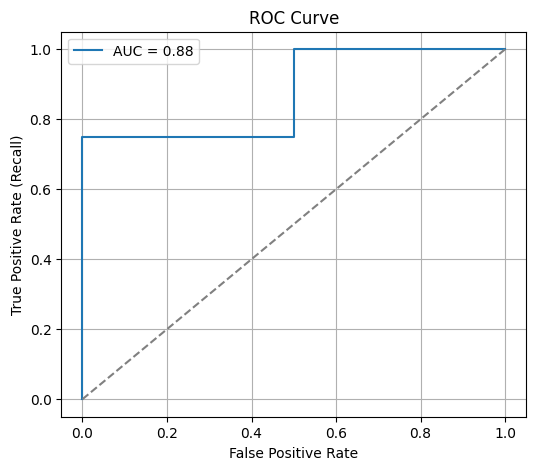

In [2]:
# ROC Curve & AUC Score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Compute ROC values
fpr, tpr, thresholds = roc_curve(y_test, probs)

# 2. Compute AUC score
auc_score = roc_auc_score(y_test, probs)
print("AUC Score:", auc_score)

# 3. Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)

plt.show()


In [3]:
# Advanced Logistic Regression
# (L1 & L2 Regularization)

from sklearn.linear_model import LogisticRegression

# 1. Ridge Regression (L2 Regularization)
ridge_model = LogisticRegression(
    penalty="l2",
    solver="liblinear"
)
ridge_model.fit(X_train, y_train)

print("Ridge (L2) coefficients:")
print(ridge_model.coef_)

# 2. Lasso Regression (L1 Regularization)
lasso_model = LogisticRegression(
    penalty="l1",
    solver="liblinear"
)
lasso_model.fit(X_train, y_train)

print("\nLasso (L1) coefficients:")
print(lasso_model.coef_)


Ridge (L2) coefficients:
[[-2.03393216e-01  1.90658653e-04]]

Lasso (L1) coefficients:
[[-3.69375506e-01  3.41910681e-04]]


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
